In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

In [24]:
df = pd.read_csv('/Users/ujjwalbhatta/Desktop/ecommerce-product-success-predictor/data/featured/amazon_electronics_featured.csv') 
# Missing values
print("\nMissing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("✅ No missing values!")



Missing Values:
                Missing  Percentage
text                 40        0.13
word_count           40        0.13
sentence_count       40        0.13
review_title         38        0.13


Mean Rating: 4.27
Median Rating: 4.40
Std Dev: 0.42
Min Rating: 1.00
Max Rating: 5.00

Rating Distribution:
  1.0 ⭐:    42 (  0.1%) 
  1.1 ⭐:     1 (  0.0%) 
  1.3 ⭐:     2 (  0.0%) 
  1.4 ⭐:     1 (  0.0%) 
  1.5 ⭐:     2 (  0.0%) 
  1.6 ⭐:     2 (  0.0%) 
  1.7 ⭐:     1 (  0.0%) 
  1.9 ⭐:     2 (  0.0%) 
  2.0 ⭐:    17 (  0.1%) 
  2.1 ⭐:     2 (  0.0%) 
  2.2 ⭐:     5 (  0.0%) 
  2.3 ⭐:     6 (  0.0%) 
  2.4 ⭐:     6 (  0.0%) 
  2.5 ⭐:    20 (  0.1%) 
  2.6 ⭐:    14 (  0.0%) 
  2.7 ⭐:    42 (  0.1%) 
  2.8 ⭐:    56 (  0.2%) 
  2.9 ⭐:    75 (  0.3%) 
  3.0 ⭐:   174 (  0.6%) 
  3.1 ⭐:   163 (  0.5%) 
  3.2 ⭐:   236 (  0.8%) 
  3.3 ⭐:   268 (  0.9%) 
  3.4 ⭐:   344 (  1.1%) █
  3.5 ⭐:   409 (  1.4%) █
  3.6 ⭐:   487 (  1.6%) █
  3.7 ⭐:   714 (  2.4%) ██
  3.8 ⭐:   925 (  3.1%) ███
  3.9 ⭐: 1,142 (  3.8%) ███
  4.0 ⭐: 1,668 (  5.6%) █████
  4.1 ⭐: 1,911 (  6.4%) ██████
  4.2 ⭐: 2,513 (  8.4%) ████████
  4.3 ⭐: 3,254 ( 10.8%) ██████████
  4.4 ⭐: 3,299 ( 11.0%) ██████████
  4.5 ⭐: 4,020 ( 

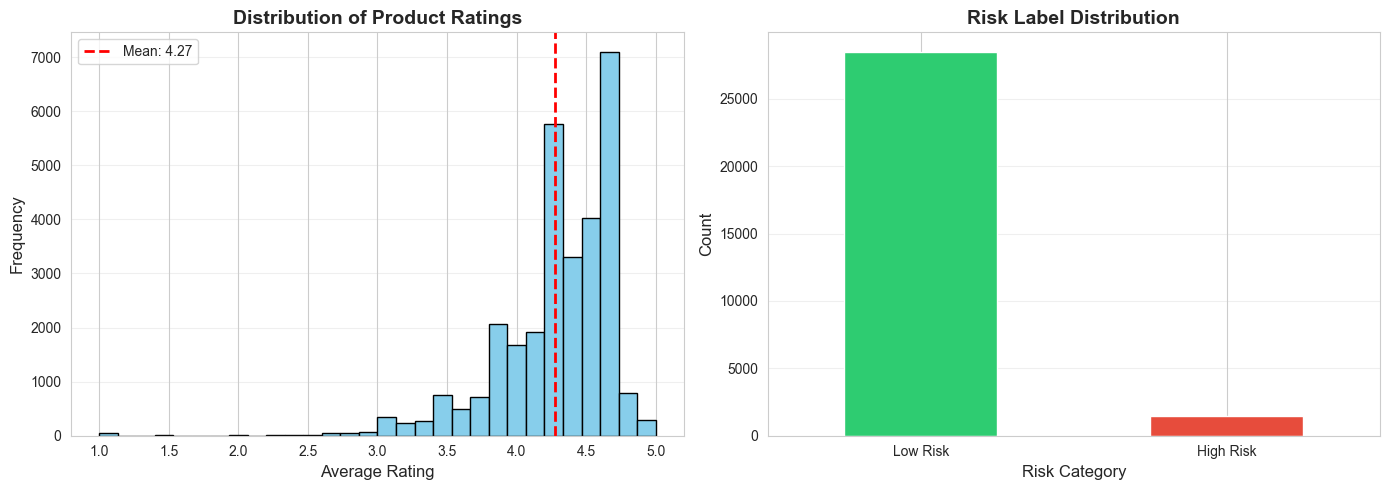

In [25]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 5)

# ==================== RATING ANALYSIS ====================

print(f"Mean Rating: {df['average_rating'].mean():.2f}")
print(f"Median Rating: {df['average_rating'].median():.2f}")
print(f"Std Dev: {df['average_rating'].std():.2f}")
print(f"Min Rating: {df['average_rating'].min():.2f}")
print(f"Max Rating: {df['average_rating'].max():.2f}")

# Value counts
print("\nRating Distribution:")
rating_counts = df['average_rating'].value_counts().sort_index()
for rating, count in rating_counts.items():
    pct = (count / len(df) * 100)
    bar = "█" * int(pct)
    print(f"  {rating:.1f} ⭐: {count:5,} ({pct:5.1f}%) {bar}")

# ==================== RISK LABEL ANALYSIS ====================
print("\n" + "=" * 60)
print("🚨 RISK LABEL DISTRIBUTION (Classification Target)")
print("-" * 60)

# Value counts
risk_counts = df['risk_label'].value_counts()
print("\nClass Distribution:")
for label, count in risk_counts.items():
    pct = (count / len(df) * 100)
    bar = "█" * int(pct / 2)
    print(f"  {label}: {count:5,} ({pct:5.1f}%) {bar}")

# Check balance
balance_ratio = risk_counts.min() / risk_counts.max()
print(f"\n⚖️ Class Balance Ratio: {balance_ratio:.2f}")
if balance_ratio < 0.3:
    print("⚠️ WARNING: Highly imbalanced! Consider using SMOTE or class weights.")
elif balance_ratio < 0.7:
    print("⚠️ Slightly imbalanced. May need class weights.")
else:
    print("✅ Well balanced!")

# ==================== VISUALIZATIONS ====================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Rating Distribution
axes[0].hist(df['average_rating'], bins=30, color='skyblue', edgecolor='black')
axes[0].axvline(df['average_rating'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {df["average_rating"].mean():.2f}')
axes[0].set_xlabel('Average Rating', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Product Ratings', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Risk Label Distribution
risk_counts.plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_xlabel('Risk Category', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Risk Label Distribution', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


✅ Found 15 features to use:
   1. log_price
   2. log_reviewCount
   3. brand_tier_encoded
   4. brand_tier_risk_score
   5. is_rare_brand
   6. category_risk_score
   7. category_size_encoded
   8. is_risky_category
   9. is_major_category
  10. sentence_count
  11. sentiment_polarity
  12. sentiment_subjectivity
  13. positive_words
  14. negative_words
  15. quality_ratio
                            mean       std       min         max
log_price               3.484715  0.858410  0.009950    9.210239
log_reviewCount         7.153686  2.601093  0.693147   13.849812
brand_tier_encoded      2.395660  0.998764  0.000000    3.000000
brand_tier_risk_score   4.273138  0.066334  4.233667    4.454448
is_rare_brand           0.699647  0.458419  0.000000    1.000000
category_risk_score     4.273138  0.074580  4.161818    4.664407
category_size_encoded   0.838356  0.781260  0.000000    3.000000
is_risky_category       0.090606  0.287053  0.000000    1.000000
is_major_category       0.538436  0.

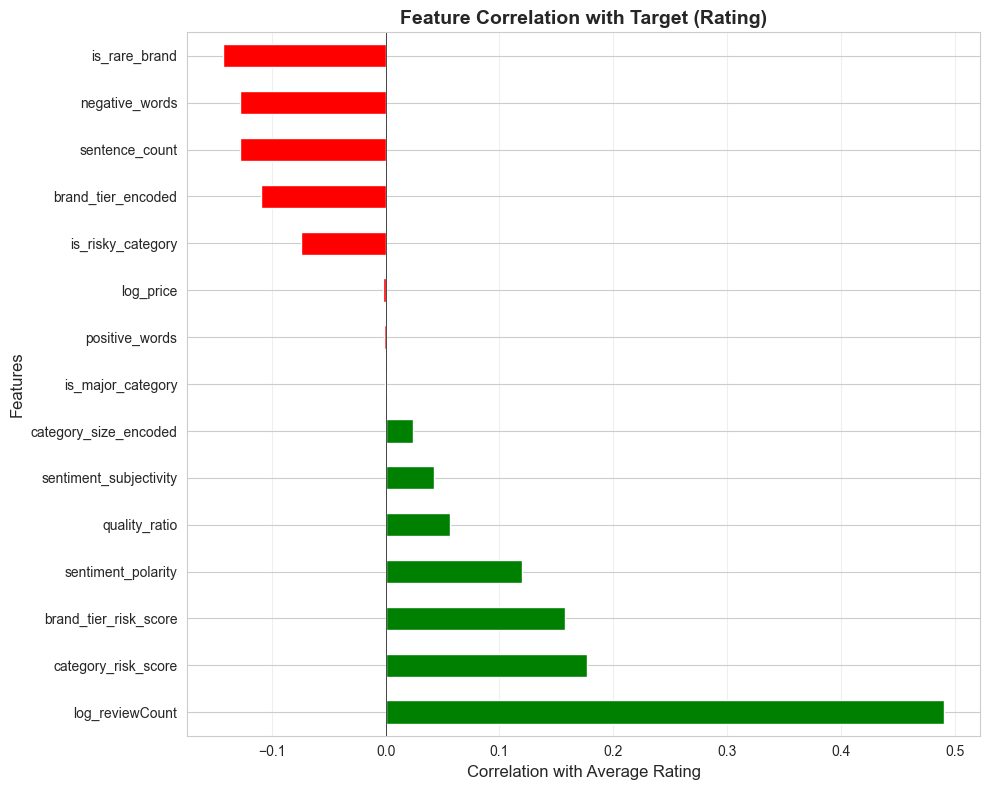

In [26]:
feature_columns = [
    # Numerical features
    'log_price', 
    'log_reviewCount',
    
    # Brand features  
    'brand_tier_encoded',
    'brand_tier_risk_score',
    'is_rare_brand',
    
    # Category features
    'category_risk_score',
    'category_size_encoded',
    'is_risky_category',
    'is_major_category',
    
    # Text/Quality features
    'sentence_count', 
    'sentiment_polarity',
    'sentiment_subjectivity',
    'positive_words',
    'negative_words',
    'quality_ratio'
]

# Filter only existing columns
existing_features = [col for col in feature_columns if col in df.columns]
print(f"\n✅ Found {len(existing_features)} features to use:")
for i, feat in enumerate(existing_features, 1):
    print(f"  {i:2}. {feat}")

print(df[existing_features].describe().T[['mean', 'std', 'min', 'max']])

# ==================== VISUALIZATIONS ====================

# 1. Correlation with Target (Rating)
print("\n" + "=" * 60)
print("CORRELATION WITH RATING")
print("=" * 60)

correlations = df[existing_features + ['average_rating']].corr()['average_rating'].drop('average_rating').sort_values(ascending=False)
print("\nTop 10 Most Correlated Features:")
print(correlations.head(10))

# Plot correlation
plt.figure(figsize=(10, 8))
correlations.plot(kind='barh', color=['green' if x > 0 else 'red' for x in correlations])
plt.xlabel('Correlation with Average Rating', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Correlation with Target (Rating)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [27]:


# Features (X)
X = df[existing_features].copy()

# Targets (y)
y_rating = df['average_rating'].copy()  # For regression
y_risk = df['risk_label'].copy()        # For classification

# Handle missing values (simple approach: fill with median/mode)
for col in X.columns:
    if X[col].isnull().sum() > 0:
        if X[col].dtype in ['float64', 'int64']:
            X[col].fillna(X[col].median(), inplace=True)
        else:
            X[col].fillna(X[col].mode()[0], inplace=True)

print(f"\n✅ Final feature matrix shape: {X.shape}")
print(f"✅ No missing values: {X.isnull().sum().sum() == 0}")

# First split: 70% train, 30% temp
X_train, X_temp, y_rating_train, y_rating_temp, y_risk_train, y_risk_temp = train_test_split(
    X, y_rating, y_risk, 
    test_size=0.3, 
    random_state=42,
    stratify=y_risk  # Ensure balanced risk distribution
)

# Second split: 15% validation, 15% test (50-50 of the 30%)
X_val, X_test, y_rating_val, y_rating_test, y_risk_val, y_risk_test = train_test_split(
    X_temp, y_rating_temp, y_risk_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_risk_temp
)

# Display split info
print("\n📊 Split Sizes:")
print(f"  Training:   {len(X_train):5,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"  Validation: {len(X_val):5,} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"  Test:       {len(X_test):5,} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"  Total:      {len(X):5,} samples")

# Check class distribution in each split
print("\n🚨 Risk Label Distribution:")
print("\nTraining Set:")
print(y_risk_train.value_counts())
print(f"  Ratio: {y_risk_train.value_counts().min() / y_risk_train.value_counts().max():.2f}")

print("\nValidation Set:")
print(y_risk_val.value_counts())
print(f"  Ratio: {y_risk_val.value_counts().min() / y_risk_val.value_counts().max():.2f}")

print("\nTest Set:")
print(y_risk_test.value_counts())
print(f"  Ratio: {y_risk_test.value_counts().min() / y_risk_test.value_counts().max():.2f}")

print("  • X_train, X_val, X_test (features)")
print("  • y_rating_train, y_rating_val, y_rating_test (regression targets)")
print("  • y_risk_train, y_risk_val, y_risk_test (classification targets)")


✅ Final feature matrix shape: (29998, 15)
✅ No missing values: True

📊 Split Sizes:
  Training:   20,998 samples (70.0%)
  Validation: 4,500 samples (15.0%)
  Test:       4,500 samples (15.0%)
  Total:      29,998 samples

🚨 Risk Label Distribution:

Training Set:
risk_label
Low Risk     19961
High Risk     1037
Name: count, dtype: int64
  Ratio: 0.05

Validation Set:
risk_label
Low Risk     4278
High Risk     222
Name: count, dtype: int64
  Ratio: 0.05

Test Set:
risk_label
Low Risk     4278
High Risk     222
Name: count, dtype: int64
  Ratio: 0.05
  • X_train, X_val, X_test (features)
  • y_rating_train, y_rating_val, y_rating_test (regression targets)
  • y_risk_train, y_risk_val, y_risk_test (classification targets)


/var/folders/l7/fjgcny815qj4hnytpzftpbsc0000gn/T/ipykernel_43225/1798245462.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)



🔧 Creating Linear Regression model...
📚 Training on training data...
✅ Training complete!

🔮 Making predictions...

MODEL PERFORMANCE

📚 TRAINING SET:
  RMSE (Root Mean Squared Error): 0.3598 ⭐
  MAE (Mean Absolute Error):      0.2591 ⭐
  R² Score:                        0.2739
  📊 Excellent! Predictions within ±0.36 stars on average

🔍 VALIDATION SET:
  RMSE (Root Mean Squared Error): 0.3612 ⭐
  MAE (Mean Absolute Error):      0.2615 ⭐
  R² Score:                        0.2590
  📊 Excellent! Predictions within ±0.36 stars on average

🧪 TEST SET:
  RMSE (Root Mean Squared Error): 0.3633 ⭐
  MAE (Mean Absolute Error):      0.2627 ⭐
  R² Score:                        0.2603
  📊 Excellent! Predictions within ±0.36 stars on average


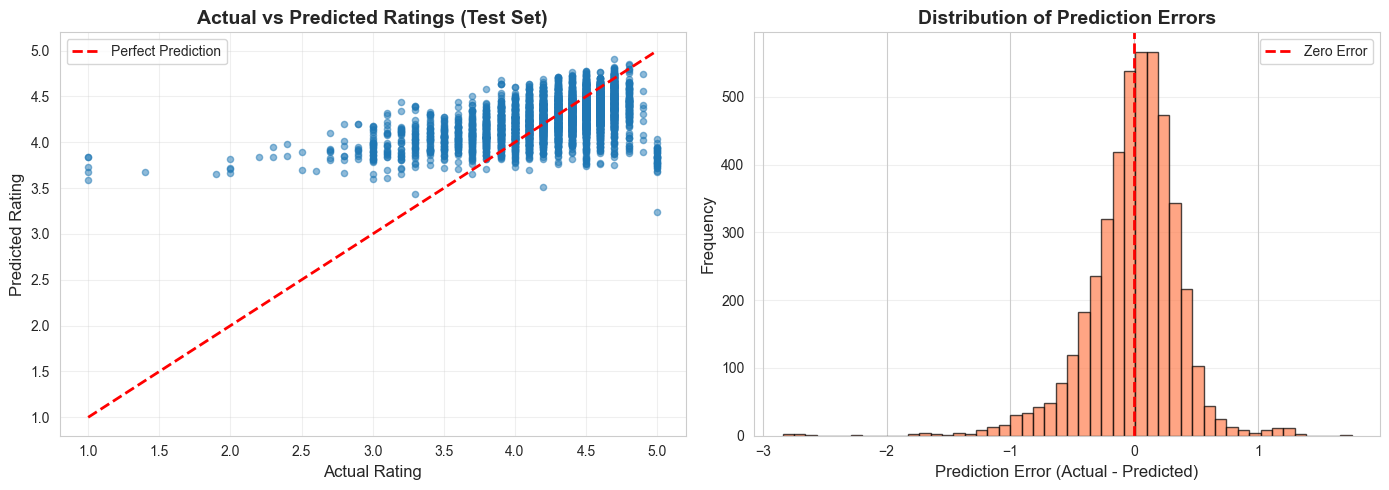


TOP 10 MOST IMPORTANT FEATURES

(Larger absolute value = more influence on rating)
               Feature  Coefficient
 brand_tier_risk_score    -0.451854
    sentiment_polarity     0.109318
       log_reviewCount     0.082862
     is_risky_category    -0.065217
        negative_words    -0.053206
sentiment_subjectivity    -0.032432
 category_size_encoded     0.031476
    brand_tier_encoded    -0.029096
         is_rare_brand     0.025524
     is_major_category    -0.022387


In [28]:
# Initialize model
print("\n🔧 Creating Linear Regression model...")
lr_model = LinearRegression()

# Train model
print("📚 Training on training data...")
lr_model.fit(X_train, y_rating_train)
print("✅ Training complete!")

# Make predictions
print("\n🔮 Making predictions...")
y_pred_train = lr_model.predict(X_train)
y_pred_val = lr_model.predict(X_val)
y_pred_test = lr_model.predict(X_test)

# Calculate metrics
print("\n" + "=" * 60)
print("MODEL PERFORMANCE")
print("=" * 60)

def evaluate_regression(y_true, y_pred, set_name):
    """Calculate and display regression metrics"""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{set_name}:")
    print(f"  RMSE (Root Mean Squared Error): {rmse:.4f} ⭐")
    print(f"  MAE (Mean Absolute Error):      {mae:.4f} ⭐")
    print(f"  R² Score:                        {r2:.4f}")
    
    # Interpretation
    if rmse < 0.5:
        print(f"  📊 Excellent! Predictions within ±{rmse:.2f} stars on average")
    elif rmse < 0.8:
        print(f"  📊 Good! Predictions within ±{rmse:.2f} stars on average")
    else:
        print(f"  📊 Room for improvement. Predictions ±{rmse:.2f} stars off")
    
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Evaluate on all sets
train_metrics = evaluate_regression(y_rating_train, y_pred_train, "📚 TRAINING SET")
val_metrics = evaluate_regression(y_rating_val, y_pred_val, "🔍 VALIDATION SET")
test_metrics = evaluate_regression(y_rating_test, y_pred_test, "🧪 TEST SET")


# ==================== VISUALIZATIONS ====================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Actual vs Predicted
axes[0].scatter(y_rating_test, y_pred_test, alpha=0.5, s=20)
axes[0].plot([y_rating_test.min(), y_rating_test.max()], 
             [y_rating_test.min(), y_rating_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Rating', fontsize=12)
axes[0].set_ylabel('Predicted Rating', fontsize=12)
axes[0].set_title('Actual vs Predicted Ratings (Test Set)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Prediction Error Distribution
errors = y_rating_test - y_pred_test
axes[1].hist(errors, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[1].set_xlabel('Prediction Error (Actual - Predicted)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Prediction Errors', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Feature importance (coefficients)
print("\n" + "=" * 60)
print("TOP 10 MOST IMPORTANT FEATURES")
print("=" * 60)

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\n(Larger absolute value = more influence on rating)")
print(feature_importance[['Feature', 'Coefficient']].head(10).to_string(index=False))


ADVANCED REGRESSION MODELS

1️⃣ RANDOM FOREST

🌲 Training Random Forest...
✅ Training complete! Time: 1.17s

📊 Test Set Performance:
  RMSE: 0.3446
  MAE:  0.2346
  R²:   0.3345

2️⃣ XGBOOST

🚀 Training XGBoost...
✅ Training complete! Time: 0.14s

📊 Test Set Performance:
  RMSE: 0.3470
  MAE:  0.2385
  R²:   0.3250

3️⃣ LIGHTGBM

⚡ Training LightGBM...
✅ Training complete! Time: 0.22s

📊 Test Set Performance:
  RMSE: 0.3425
  MAE:  0.2387
  R²:   0.3425

MODEL COMPARISON


        Model     RMSE      MAE       R2     Time
Random Forest 0.344573 0.234569 0.334521 1.170313
      XGBoost 0.347026 0.238539 0.325012 0.140186
     LightGBM 0.342498 0.238747 0.342512 0.217903

🏆 Best Model: LightGBM
   RMSE: 0.3425


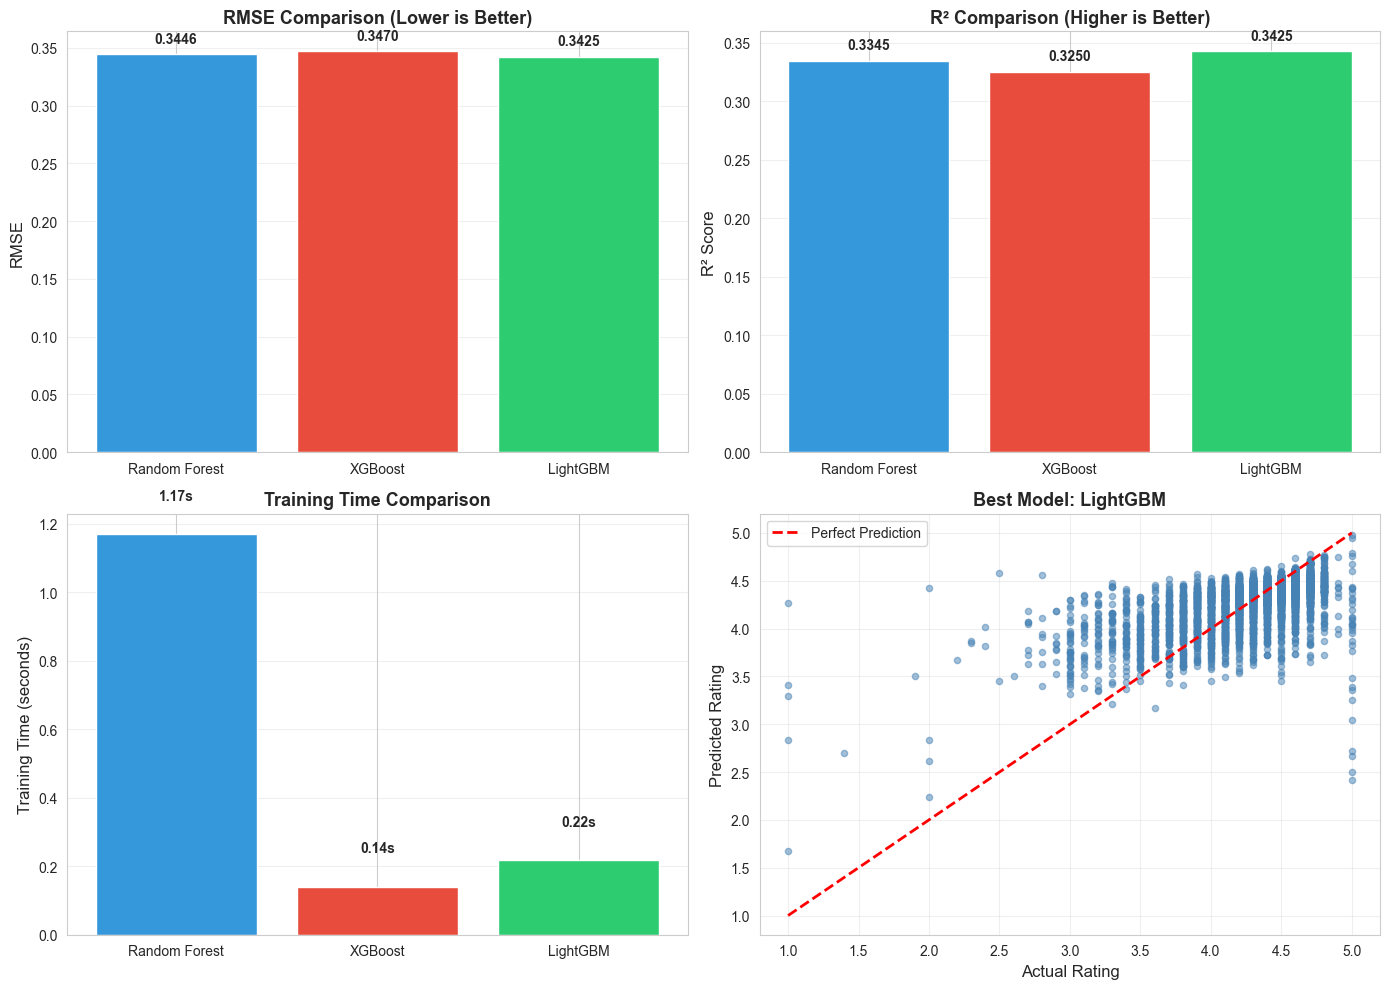

In [29]:


print("=" * 60)
print("ADVANCED REGRESSION MODELS")
print("=" * 60)

# Store results
results = []

# ==================== RANDOM FOREST ====================
print("\n" + "=" * 60)
print("1️⃣ RANDOM FOREST")
print("=" * 60)

print("\n🌲 Training Random Forest...")
start_time = time.time()

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

rf_model.fit(X_train, y_rating_train)
rf_time = time.time() - start_time

print(f"✅ Training complete! Time: {rf_time:.2f}s")

# Predictions
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_val = rf_model.predict(X_val)
y_pred_rf_test = rf_model.predict(X_test)

# Metrics
rf_rmse = np.sqrt(mean_squared_error(y_rating_test, y_pred_rf_test))
rf_mae = mean_absolute_error(y_rating_test, y_pred_rf_test)
rf_r2 = r2_score(y_rating_test, y_pred_rf_test)

print(f"\n📊 Test Set Performance:")
print(f"  RMSE: {rf_rmse:.4f}")
print(f"  MAE:  {rf_mae:.4f}")
print(f"  R²:   {rf_r2:.4f}")

results.append({
    'Model': 'Random Forest',
    'RMSE': rf_rmse,
    'MAE': rf_mae,
    'R2': rf_r2,
    'Time': rf_time
})

# ==================== XGBOOST ====================
print("\n" + "=" * 60)
print("2️⃣ XGBOOST")
print("=" * 60)

print("\n🚀 Training XGBoost...")
start_time = time.time()

xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

xgb_model.fit(X_train, y_rating_train)
xgb_time = time.time() - start_time

print(f"✅ Training complete! Time: {xgb_time:.2f}s")

# Predictions
y_pred_xgb_train = xgb_model.predict(X_train)
y_pred_xgb_val = xgb_model.predict(X_val)
y_pred_xgb_test = xgb_model.predict(X_test)

# Metrics
xgb_rmse = np.sqrt(mean_squared_error(y_rating_test, y_pred_xgb_test))
xgb_mae = mean_absolute_error(y_rating_test, y_pred_xgb_test)
xgb_r2 = r2_score(y_rating_test, y_pred_xgb_test)

print(f"\n📊 Test Set Performance:")
print(f"  RMSE: {xgb_rmse:.4f}")
print(f"  MAE:  {xgb_mae:.4f}")
print(f"  R²:   {xgb_r2:.4f}")

results.append({
    'Model': 'XGBoost',
    'RMSE': xgb_rmse,
    'MAE': xgb_mae,
    'R2': xgb_r2,
    'Time': xgb_time
})

# ==================== LIGHTGBM ====================
print("\n" + "=" * 60)
print("3️⃣ LIGHTGBM")
print("=" * 60)

print("\n⚡ Training LightGBM...")
start_time = time.time()

lgb_model = LGBMRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

lgb_model.fit(X_train, y_rating_train)
lgb_time = time.time() - start_time

print(f"✅ Training complete! Time: {lgb_time:.2f}s")

# Predictions
y_pred_lgb_train = lgb_model.predict(X_train)
y_pred_lgb_val = lgb_model.predict(X_val)
y_pred_lgb_test = lgb_model.predict(X_test)

# Metrics
lgb_rmse = np.sqrt(mean_squared_error(y_rating_test, y_pred_lgb_test))
lgb_mae = mean_absolute_error(y_rating_test, y_pred_lgb_test)
lgb_r2 = r2_score(y_rating_test, y_pred_lgb_test)

print(f"\n📊 Test Set Performance:")
print(f"  RMSE: {lgb_rmse:.4f}")
print(f"  MAE:  {lgb_mae:.4f}")
print(f"  R²:   {lgb_r2:.4f}")

results.append({
    'Model': 'LightGBM',
    'RMSE': lgb_rmse,
    'MAE': lgb_mae,
    'R2': lgb_r2,
    'Time': lgb_time
})

# ==================== COMPARISON ====================
print("\n" + "=" * 60)
print("MODEL COMPARISON")
print("=" * 60)

results_df = pd.DataFrame(results)
print("\n")
print(results_df.to_string(index=False))

# Find best model
best_model_idx = results_df['RMSE'].idxmin()
best_model_name = results_df.loc[best_model_idx, 'Model']
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   RMSE: {results_df.loc[best_model_idx, 'RMSE']:.4f}")

# ==================== VISUALIZATIONS ====================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: RMSE Comparison
axes[0, 0].bar(results_df['Model'], results_df['RMSE'], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[0, 0].set_ylabel('RMSE', fontsize=12)
axes[0, 0].set_title('RMSE Comparison (Lower is Better)', fontsize=13, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(results_df['RMSE']):
    axes[0, 0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

# Plot 2: R² Comparison
axes[0, 1].bar(results_df['Model'], results_df['R2'], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[0, 1].set_ylabel('R² Score', fontsize=12)
axes[0, 1].set_title('R² Comparison (Higher is Better)', fontsize=13, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(results_df['R2']):
    axes[0, 1].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

# Plot 3: Training Time
axes[1, 0].bar(results_df['Model'], results_df['Time'], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[1, 0].set_ylabel('Training Time (seconds)', fontsize=12)
axes[1, 0].set_title('Training Time Comparison', fontsize=13, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(results_df['Time']):
    axes[1, 0].text(i, v + 0.1, f'{v:.2f}s', ha='center', fontweight='bold')

# Plot 4: Actual vs Predicted (Best Model)
if best_model_name == 'Random Forest':
    best_predictions = y_pred_rf_test
elif best_model_name == 'XGBoost':
    best_predictions = y_pred_xgb_test
else:
    best_predictions = y_pred_lgb_test

axes[1, 1].scatter(y_rating_test, best_predictions, alpha=0.5, s=20, color='steelblue')
axes[1, 1].plot([y_rating_test.min(), y_rating_test.max()], 
                [y_rating_test.min(), y_rating_test.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[1, 1].set_xlabel('Actual Rating', fontsize=12)
axes[1, 1].set_ylabel('Predicted Rating', fontsize=12)
axes[1, 1].set_title(f'Best Model: {best_model_name}', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

BASELINE MODEL: RISK PREDICTION (CLASSIFICATION)

🔧 Creating Logistic Regression model...
📚 Training on training data...
✅ Training complete!

🔮 Making predictions...

MODEL PERFORMANCE

📚 TRAINING SET:
  Accuracy:  0.9491 (94.91%)
  Precision: 0.9289
  Recall:    0.9491
  F1-Score:  0.9334
  📊 Excellent accuracy!

🔍 VALIDATION SET:
  Accuracy:  0.9493 (94.93%)
  Precision: 0.9293
  Recall:    0.9493
  F1-Score:  0.9335
  📊 Excellent accuracy!

🧪 TEST SET:
  Accuracy:  0.9511 (95.11%)
  Precision: 0.9340
  Recall:    0.9511
  F1-Score:  0.9353
  📊 Excellent accuracy!

DETAILED CLASSIFICATION REPORT (Test Set)
              precision    recall  f1-score   support

   High Risk       0.52      0.10      0.17       222
    Low Risk       0.96      1.00      0.97      4278

    accuracy                           0.95      4500
   macro avg       0.74      0.55      0.57      4500
weighted avg       0.93      0.95      0.94      4500



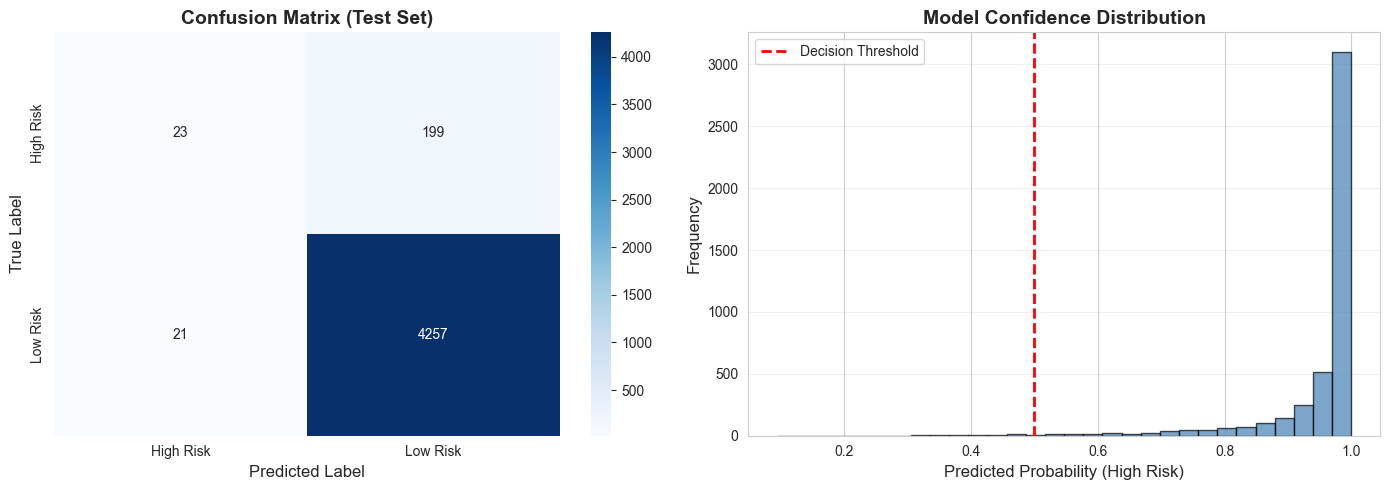


TOP 10 MOST IMPORTANT FEATURES FOR RISK PREDICTION

(Positive = increases High Risk, Negative = decreases High Risk)
               Feature  Coefficient
    sentiment_polarity     1.092712
       log_reviewCount     0.737758
         is_rare_brand     0.406877
        negative_words    -0.231251
 brand_tier_risk_score    -0.228560
     is_risky_category    -0.219197
    brand_tier_encoded    -0.144636
     is_major_category    -0.135876
 category_size_encoded     0.126228
sentiment_subjectivity    -0.124736

✅ Baseline classification model complete!


In [30]:
print("=" * 60)
print("BASELINE MODEL: RISK PREDICTION (CLASSIFICATION)")
print("=" * 60)

# Initialize model
print("\n🔧 Creating Logistic Regression model...")
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Train model
print("📚 Training on training data...")
log_model.fit(X_train, y_risk_train)
print("✅ Training complete!")

# Make predictions
print("\n🔮 Making predictions...")
y_pred_train_clf = log_model.predict(X_train)
y_pred_val_clf = log_model.predict(X_val)
y_pred_test_clf = log_model.predict(X_test)

# Get prediction probabilities (for later analysis)
y_pred_proba_test = log_model.predict_proba(X_test)

# Calculate metrics
print("\n" + "=" * 60)
print("MODEL PERFORMANCE")
print("=" * 60)

def evaluate_classification(y_true, y_pred, set_name):
    """Calculate and display classification metrics"""
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    
    print(f"\n{set_name}:")
    print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    
    # Interpretation
    if accuracy > 0.85:
        print(f"  📊 Excellent accuracy!")
    elif accuracy > 0.75:
        print(f"  📊 Good accuracy!")
    else:
        print(f"  📊 Room for improvement.")
    
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}

# Evaluate on all sets
train_metrics_clf = evaluate_classification(y_risk_train, y_pred_train_clf, "📚 TRAINING SET")
val_metrics_clf = evaluate_classification(y_risk_val, y_pred_val_clf, "🔍 VALIDATION SET")
test_metrics_clf = evaluate_classification(y_risk_test, y_pred_test_clf, "🧪 TEST SET")

# Detailed classification report
print("\n" + "=" * 60)
print("DETAILED CLASSIFICATION REPORT (Test Set)")
print("=" * 60)
print(classification_report(y_risk_test, y_pred_test_clf))


# ==================== VISUALIZATIONS ====================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Confusion Matrix
cm = confusion_matrix(y_risk_test, y_pred_test_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=log_model.classes_, yticklabels=log_model.classes_)
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_title('Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')

# Plot 2: Prediction Confidence Distribution
axes[1].hist(y_pred_proba_test[:, 1], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[1].axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
axes[1].set_xlabel('Predicted Probability (High Risk)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Model Confidence Distribution', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Feature importance (coefficients)
print("\n" + "=" * 60)
print("TOP 10 MOST IMPORTANT FEATURES FOR RISK PREDICTION")
print("=" * 60)

feature_importance_clf = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_model.coef_[0]
})
feature_importance_clf['Abs_Coefficient'] = abs(feature_importance_clf['Coefficient'])
feature_importance_clf = feature_importance_clf.sort_values('Abs_Coefficient', ascending=False)

print("\n(Positive = increases High Risk, Negative = decreases High Risk)")
print(feature_importance_clf[['Feature', 'Coefficient']].head(10).to_string(index=False))

print("\n" + "=" * 60)
print("✅ Baseline classification model complete!")
print("=" * 60)

ADVANCED CLASSIFICATION MODELS

1️⃣ RANDOM FOREST

🌲 Training Random Forest...


/var/folders/l7/fjgcny815qj4hnytpzftpbsc0000gn/T/ipykernel_43225/3863443838.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_risk_train = y_risk_train.replace({'Low Risk': 0, 'High Risk': 1})
/var/folders/l7/fjgcny815qj4hnytpzftpbsc0000gn/T/ipykernel_43225/3863443838.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_risk_val = y_risk_val.replace({'Low Risk': 0, 'High Risk': 1})
/var/folders/l7/fjgcny815qj4hnytpzftpbsc0000gn/T/ipykernel_43225/3863443838.py:20: FutureWarning: Downcasting behavior in `replace` is deprecate

✅ Training complete! Time: 0.23s

📊 Test Set Performance:
  Accuracy:  0.9509 (95.09%)
  Precision: 0.9317
  Recall:    0.9509
  F1-Score:  0.9311

DETAILED CLASSIFICATION REPORT (Test Set) - Random Forest
              precision    recall  f1-score   support

    Low Risk       0.95      1.00      0.97      4278
   High Risk       0.52      0.05      0.09       222

    accuracy                           0.95      4500
   macro avg       0.74      0.52      0.53      4500
weighted avg       0.93      0.95      0.93      4500


2️⃣ XGBOOST

🚀 Training XGBoost...
✅ Training complete! Time: 0.05s

📊 Test Set Performance:
  Accuracy:  0.9527 (95.27%)
  Precision: 0.9387
  Recall:    0.9527
  F1-Score:  0.9375

DETAILED CLASSIFICATION REPORT (Test Set) - XGBoost
              precision    recall  f1-score   support

    Low Risk       0.96      1.00      0.98      4278
   High Risk       0.60      0.12      0.20       222

    accuracy                           0.95      4500
   macro avg 

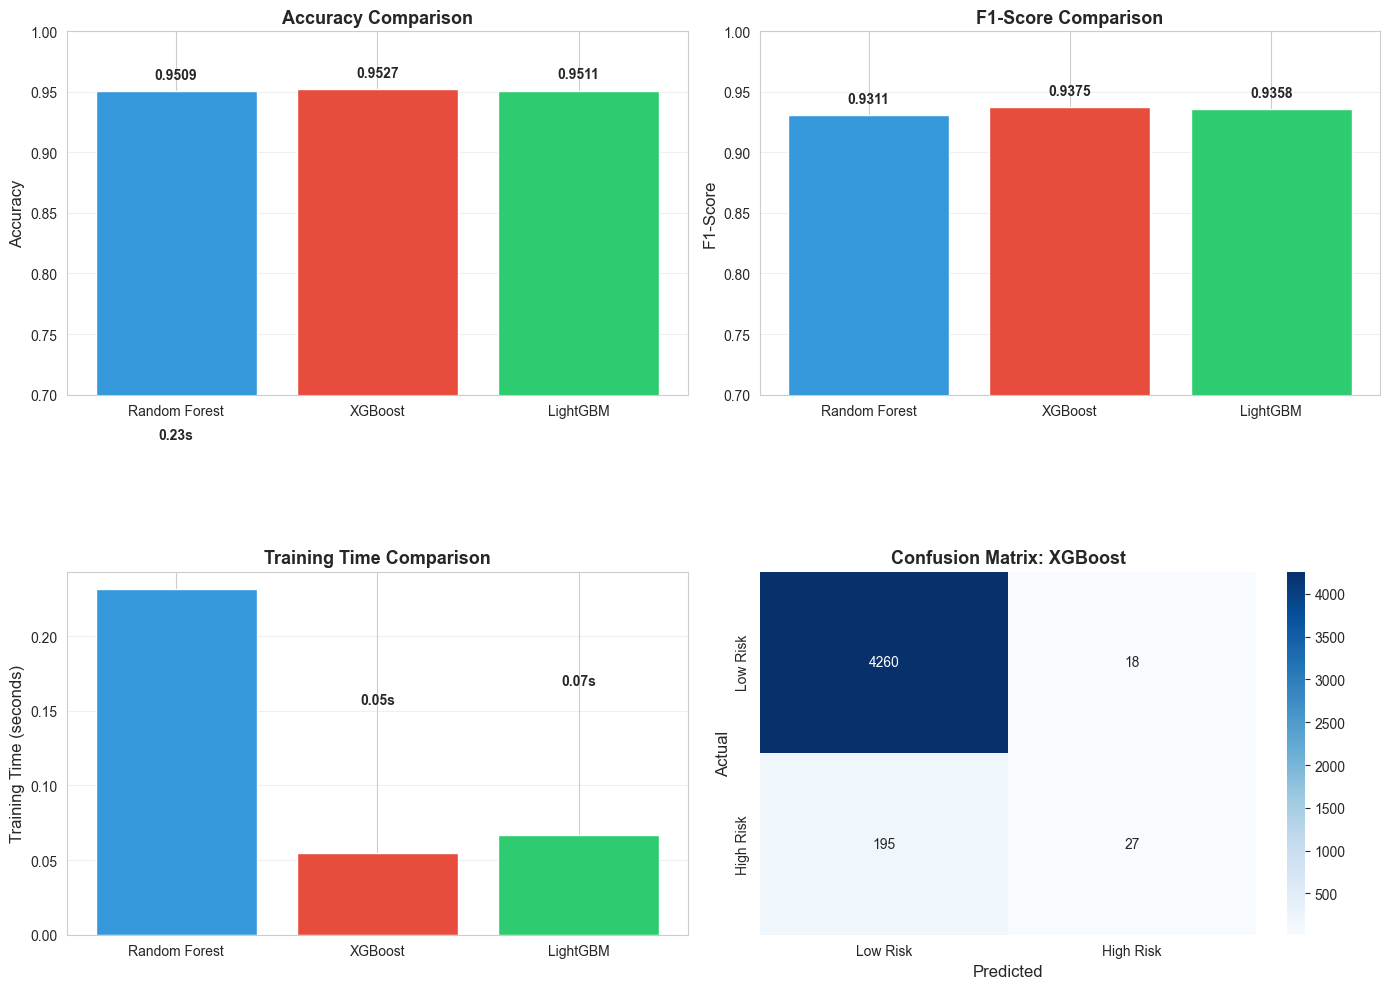

In [31]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

print("=" * 60)
print("ADVANCED CLASSIFICATION MODELS")
print("=" * 60)

# Store results
results_clf = []

# Convert labels to binary
y_risk_train = y_risk_train.replace({'Low Risk': 0, 'High Risk': 1})
y_risk_val = y_risk_val.replace({'Low Risk': 0, 'High Risk': 1})
y_risk_test = y_risk_test.replace({'Low Risk': 0, 'High Risk': 1})

# ==================== RANDOM FOREST ====================
print("\n" + "=" * 60)
print("1️⃣ RANDOM FOREST")
print("=" * 60)

print("\n🌲 Training Random Forest...")
start_time = time.time()

rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

rf_clf.fit(X_train, y_risk_train)
rf_clf_time = time.time() - start_time

print(f"✅ Training complete! Time: {rf_clf_time:.2f}s")

# Predictions
y_pred_rf_clf = rf_clf.predict(X_test)

# Metrics
rf_acc = accuracy_score(y_risk_test, y_pred_rf_clf)
rf_prec, rf_rec, rf_f1, _ = precision_recall_fscore_support(y_risk_test, y_pred_rf_clf, average='weighted')

print(f"\n📊 Test Set Performance:")
print(f"  Accuracy:  {rf_acc:.4f} ({rf_acc*100:.2f}%)")
print(f"  Precision: {rf_prec:.4f}")
print(f"  Recall:    {rf_rec:.4f}")
print(f"  F1-Score:  {rf_f1:.4f}")

results_clf.append({
    'Model': 'Random Forest',
    'Accuracy': rf_acc,
    'Precision': rf_prec,
    'Recall': rf_rec,
    'F1': rf_f1,
    'Time': rf_clf_time
})

# Detailed classification report
print("\n" + "=" * 60)
print("DETAILED CLASSIFICATION REPORT (Test Set) - Random Forest")
print("=" * 60)
print(classification_report(y_risk_test, y_pred_rf_clf, target_names=['Low Risk', 'High Risk']))

# ==================== XGBOOST ====================
print("\n" + "=" * 60)
print("2️⃣ XGBOOST")
print("=" * 60)

print("\n🚀 Training XGBoost...")
start_time = time.time()

xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

xgb_clf.fit(X_train, y_risk_train)
xgb_clf_time = time.time() - start_time

print(f"✅ Training complete! Time: {xgb_clf_time:.2f}s")

# Predictions
y_pred_xgb_clf = xgb_clf.predict(X_test)

# Metrics
xgb_acc = accuracy_score(y_risk_test, y_pred_xgb_clf)
xgb_prec, xgb_rec, xgb_f1, _ = precision_recall_fscore_support(y_risk_test, y_pred_xgb_clf, average='weighted')

print(f"\n📊 Test Set Performance:")
print(f"  Accuracy:  {xgb_acc:.4f} ({xgb_acc*100:.2f}%)")
print(f"  Precision: {xgb_prec:.4f}")
print(f"  Recall:    {xgb_rec:.4f}")
print(f"  F1-Score:  {xgb_f1:.4f}")

results_clf.append({
    'Model': 'XGBoost',
    'Accuracy': xgb_acc,
    'Precision': xgb_prec,
    'Recall': xgb_rec,
    'F1': xgb_f1,
    'Time': xgb_clf_time
})

# Detailed classification report
print("\n" + "=" * 60)
print("DETAILED CLASSIFICATION REPORT (Test Set) - XGBoost")
print("=" * 60)
print(classification_report(y_risk_test, y_pred_xgb_clf, target_names=['Low Risk', 'High Risk']))

# ==================== LIGHTGBM ====================
print("\n" + "=" * 60)
print("3️⃣ LIGHTGBM")
print("=" * 60)

print("\n⚡ Training LightGBM...")
start_time = time.time()

lgb_clf = LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

lgb_clf.fit(X_train, y_risk_train)
lgb_clf_time = time.time() - start_time

print(f"✅ Training complete! Time: {lgb_clf_time:.2f}s")

# Predictions
y_pred_lgb_clf = lgb_clf.predict(X_test)

# Metrics
lgb_acc = accuracy_score(y_risk_test, y_pred_lgb_clf)
lgb_prec, lgb_rec, lgb_f1, _ = precision_recall_fscore_support(y_risk_test, y_pred_lgb_clf, average='weighted')

print(f"\n📊 Test Set Performance:")
print(f"  Accuracy:  {lgb_acc:.4f} ({lgb_acc*100:.2f}%)")
print(f"  Precision: {lgb_prec:.4f}")
print(f"  Recall:    {lgb_rec:.4f}")
print(f"  F1-Score:  {lgb_f1:.4f}")

results_clf.append({
    'Model': 'LightGBM',
    'Accuracy': lgb_acc,
    'Precision': lgb_prec,
    'Recall': lgb_rec,
    'F1': lgb_f1,
    'Time': lgb_clf_time
})

# Detailed classification report
print("\n" + "=" * 60)
print("DETAILED CLASSIFICATION REPORT (Test Set) - LightGBM")
print("=" * 60)
print(classification_report(y_risk_test, y_pred_lgb_clf, target_names=['Low Risk', 'High Risk']))

# ==================== COMPARISON ====================
print("\n" + "=" * 60)
print("MODEL COMPARISON")
print("=" * 60)

results_clf_df = pd.DataFrame(results_clf)
print("\n")
print(results_clf_df.to_string(index=False))

# Find best model
best_clf_idx = results_clf_df['F1'].idxmax()
best_clf_name = results_clf_df.loc[best_clf_idx, 'Model']
print(f"\n🏆 Best Model: {best_clf_name}")
print(f"   F1-Score: {results_clf_df.loc[best_clf_idx, 'F1']:.4f}")
print(f"   Accuracy: {results_clf_df.loc[best_clf_idx, 'Accuracy']:.4f}")

# ==================== VISUALIZATIONS ====================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Accuracy Comparison
axes[0, 0].bar(results_clf_df['Model'], results_clf_df['Accuracy'], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_title('Accuracy Comparison', fontsize=13, fontweight='bold')
axes[0, 0].set_ylim([0.7, 1.0])
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(results_clf_df['Accuracy']):
    axes[0, 0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

# Plot 2: F1-Score Comparison
axes[0, 1].bar(results_clf_df['Model'], results_clf_df['F1'], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[0, 1].set_ylabel('F1-Score', fontsize=12)
axes[0, 1].set_title('F1-Score Comparison', fontsize=13, fontweight='bold')
axes[0, 1].set_ylim([0.7, 1.0])
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(results_clf_df['F1']):
    axes[0, 1].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

# Plot 3: Training Time
axes[1, 0].bar(results_clf_df['Model'], results_clf_df['Time'], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[1, 0].set_ylabel('Training Time (seconds)', fontsize=12)
axes[1, 0].set_title('Training Time Comparison', fontsize=13, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(results_clf_df['Time']):
    axes[1, 0].text(i, v + 0.1, f'{v:.2f}s', ha='center', fontweight='bold')

# Plot 4: Confusion Matrix (Best Model)
if best_clf_name == 'Random Forest':
    best_predictions_clf = y_pred_rf_clf
elif best_clf_name == 'XGBoost':
    best_predictions_clf = y_pred_xgb_clf
else:
    best_predictions_clf = y_pred_lgb_clf

cm = confusion_matrix(y_risk_test, best_predictions_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1],
            xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
axes[1, 1].set_xlabel('Predicted', fontsize=12)
axes[1, 1].set_ylabel('Actual', fontsize=12)
axes[1, 1].set_title(f'Confusion Matrix: {best_clf_name}', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


In [32]:
# ==================== OVERALL RESULTS ====================
print("\n📊 MODEL PERFORMANCE SUMMARY")
print("=" * 60)

# Regression Summary
print("\n⭐ RATING PREDICTION (Regression):")
print(f"\n{'Model':<15} {'RMSE':<10} {'MAE':<10} {'R²':<10}")
print("-" * 45)
for _, row in results_df.iterrows():
    print(f"{row['Model']:<15} {row['RMSE']:<10.4f} {row['MAE']:<10.4f} {row['R2']:<10.4f}")

best_reg_model = results_df.loc[results_df['RMSE'].idxmin(), 'Model']
best_reg_rmse = results_df['RMSE'].min()
print(f"\n🏆 Winner: {best_reg_model} (RMSE: {best_reg_rmse:.4f})")

# Classification Summary
print("\n\n🚨 RISK PREDICTION (Classification):")
print(f"\n{'Model':<15} {'Accuracy':<10} {'F1-Score':<10}")
print("-" * 35)
for _, row in results_clf_df.iterrows():
    print(f"{row['Model']:<15} {row['Accuracy']:<10.4f} {row['F1']:<10.4f}")

best_clf_model = results_clf_df.loc[results_clf_df['F1'].idxmax(), 'Model']
best_clf_f1 = results_clf_df['F1'].max()
print(f"\n🏆 Winner: {best_clf_model} (F1: {best_clf_f1:.4f})")


# Get models (use best performing ones)
if best_reg_model == 'XGBoost':
    demo_reg_model = xgb_model
elif best_reg_model == 'Random Forest':
    demo_reg_model = rf_model
else:
    demo_reg_model = lgb_model

if best_clf_model == 'XGBoost':
    demo_clf_model = xgb_clf
elif best_clf_model == 'Random Forest':
    demo_clf_model = rf_clf
else:
    demo_clf_model = lgb_clf

# ==================== SAVE MODELS (Optional) ====================
print("\n" + "=" * 60)
print("💾 SAVING MODELS")
print("=" * 60)

try:
    import joblib
    
    # Save best models
    joblib.dump(demo_reg_model, 'best_regression_model.pkl')
    joblib.dump(demo_clf_model, 'best_classification_model.pkl')
    
    print("\n✅ Models saved successfully!")
    print("   • best_regression_model.pkl")
    print("   • best_classification_model.pkl")

except Exception as e:
    print(f"\n⚠️ Could not save models: {e}")


📊 MODEL PERFORMANCE SUMMARY

⭐ RATING PREDICTION (Regression):

Model           RMSE       MAE        R²        
---------------------------------------------
Random Forest   0.3446     0.2346     0.3345    
XGBoost         0.3470     0.2385     0.3250    
LightGBM        0.3425     0.2387     0.3425    

🏆 Winner: LightGBM (RMSE: 0.3425)


🚨 RISK PREDICTION (Classification):

Model           Accuracy   F1-Score  
-----------------------------------
Random Forest   0.9509     0.9311    
XGBoost         0.9527     0.9375    
LightGBM        0.9511     0.9358    

🏆 Winner: XGBoost (F1: 0.9375)

💾 SAVING MODELS

✅ Models saved successfully!
   • best_regression_model.pkl
   • best_classification_model.pkl


In [33]:
import shap
import joblib
import os

print("=" * 60)
print("🔍 SHAP ANALYSIS - MODEL EXPLAINABILITY")
print("=" * 60)

# ============================================================
# LOAD MODELS
# ============================================================
print("\n📂 Loading saved models...")

# Define model paths (notebook is inside /notebooks, models are in /models)
model_dir = os.path.join("..", "models")
reg_model_path = os.path.join(model_dir, "best_regression_model.pkl")
clf_model_path = os.path.join(model_dir, "best_classification_model.pkl")

best_reg_model = joblib.load(reg_model_path)
best_reg_model_name = "Best Regression Model"

best_clf_model = joblib.load(clf_model_path)
best_clf_model_name = "Best Classification Model"

# ============================================================
# REGRESSION SHAP (Rating Prediction)
# ============================================================
print("\n" + "=" * 60)
print("⭐ EXPLAINING RATING PREDICTIONS")
print("=" * 60)

print(f"\n🤖 Analyzing {best_reg_model_name}...")

# Create SHAP explainer
print("📊 Creating SHAP explainer (this may take a moment)...")
explainer_reg = shap.TreeExplainer(best_reg_model)

# Calculate SHAP values on a sample (limit to 500 for speed)
sample_size = min(500, len(X_test))
X_test_sample = X_test.iloc[:sample_size] if hasattr(X_test, 'iloc') else X_test[:sample_size]
print(X_test_sample)
print(f"Calculating SHAP values for {sample_size} test samples...")
shap_values_reg = explainer_reg.shap_values(X_test_sample)
print("✅ SHAP values calculated!")

# Get feature names
if hasattr(X_test, 'columns'):
    feature_names = X_test.columns.tolist()
else:
    feature_names = [f"Feature_{i}" for i in range(X_test.shape[1])]

# ==================== VISUALIZATION 1: Summary Plot ====================
print("\n📊 Creating visualizations...")

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_reg, X_test_sample, 
                  feature_names=feature_names,
                  show=False)
plt.title('SHAP Summary Plot - Rating Prediction', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 Interpretation of Summary Plot:")
print("   • Features ordered by importance (top = most important)")
print("   • Red = High feature value, Blue = Low feature value")
print("   • Position shows impact on prediction (left = decreases rating, right = increases)")

# ==================== VISUALIZATION 2: Feature Importance ====================
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_reg, X_test_sample,
                  feature_names=feature_names,
                  plot_type="bar",
                  show=False)
plt.title('Feature Importance (Mean |SHAP Value|)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ==================== SINGLE PREDICTION EXPLANATION ====================
print("\n" + "=" * 60)
print("🔬 EXPLAINING INDIVIDUAL PREDICTIONS")
print("=" * 60)

sample_indices = [0, 50, 100]

for idx in sample_indices:
    print(f"\n{'='*60}")
    print(f"Sample #{idx}")
    print(f"{'='*60}")
    
    actual_rating = y_rating_test.iloc[idx] if hasattr(y_rating_test, 'iloc') else y_rating_test[idx]
    predicted_rating = best_reg_model.predict(X_test_sample[idx:idx+1])[0]
    
    print(f"\n📊 Prediction:")
    print(f"   Actual Rating:    {actual_rating:.2f} ⭐")
    print(f"   Predicted Rating: {predicted_rating:.2f} ⭐")
    print(f"   Error:            {abs(actual_rating - predicted_rating):.2f}")
    
    plt.figure(figsize=(14, 4))
    shap.force_plot(
        explainer_reg.expected_value,
        shap_values_reg[idx],
        X_test_sample.iloc[idx] if hasattr(X_test_sample, 'iloc') else X_test_sample[idx],
        feature_names=feature_names,
        matplotlib=True,
        show=False
    )
    plt.title(f'SHAP Force Plot - Sample #{idx}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    shap_sample = shap_values_reg[idx]
    feature_impacts = pd.DataFrame({
        'Feature': feature_names,
        'SHAP_Value': shap_sample,
        'Feature_Value': X_test_sample.iloc[idx].values if hasattr(X_test_sample, 'iloc') else X_test_sample[idx]
    })
    feature_impacts['Abs_SHAP'] = abs(feature_impacts['SHAP_Value'])
    feature_impacts = feature_impacts.sort_values('Abs_SHAP', ascending=False).head(5)
    
    print(f"\n🔝 Top 5 Contributing Features:")
    for _, row in feature_impacts.iterrows():
        direction = "↑ Increases" if row['SHAP_Value'] > 0 else "↓ Decreases"
        print(f"   {row['Feature']}: {row['Feature_Value']:.2f} → {direction} rating by {abs(row['SHAP_Value']):.3f}")

# ============================================================
# CLASSIFICATION SHAP (Risk Prediction)
# ============================================================
print("\n" + "=" * 60)
print("🚨 EXPLAINING RISK PREDICTIONS")
print("=" * 60)

print(f"\n🤖 Analyzing {best_clf_model_name}...")

print("📊 Creating SHAP explainer...")
explainer_clf = shap.TreeExplainer(best_clf_model)

print(f"Calculating SHAP values for {sample_size} test samples...")
shap_values_clf = explainer_clf.shap_values(X_test_sample)

if isinstance(shap_values_clf, list):  # binary classification case
    shap_values_clf = shap_values_clf[1]

print("✅ SHAP values calculated!")

# ==================== CLASSIFICATION SUMMARY PLOT ====================
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_clf, X_test_sample,
                  feature_names=feature_names,
                  show=False)
plt.title('SHAP Summary Plot - Risk Classification', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("   • Red dots push prediction toward HIGH RISK")
print("   • Blue dots push prediction toward LOW RISK")

# ==================== SINGLE CLASSIFICATION EXPLANATION ====================
print("\n" + "=" * 60)
print("🔬 EXPLAINING INDIVIDUAL RISK PREDICTIONS")
print("=" * 60)

for idx in sample_indices:
    print(f"\n{'='*60}")
    print(f"Sample #{idx}")
    print(f"{'='*60}")
    
    actual_risk = y_risk_test.iloc[idx] if hasattr(y_risk_test, 'iloc') else y_risk_test[idx]
    predicted_risk = best_clf_model.predict(X_test_sample[idx:idx+1])[0]
    risk_proba = best_clf_model.predict_proba(X_test_sample[idx:idx+1])[0]
    
    predicted_risk_label = "High Risk" if predicted_risk == 1 else "Low Risk"
    
    print(f"\n📊 Prediction:")
    print(f"   Actual Risk:     {actual_risk}")
    print(f"   Predicted Risk:  {predicted_risk_label}")
    print(f"   High Risk Prob:  {risk_proba[1]:.2%}")
    print(f"   Low Risk Prob:   {risk_proba[0]:.2%}")
    
    shap_sample_clf = shap_values_clf[idx]
    feature_impacts_clf = pd.DataFrame({
        'Feature': feature_names,
        'SHAP_Value': shap_sample_clf,
        'Feature_Value': X_test_sample.iloc[idx].values if hasattr(X_test_sample, 'iloc') else X_test_sample[idx]
    })
    feature_impacts_clf['Abs_SHAP'] = abs(feature_impacts_clf['SHAP_Value'])
    feature_impacts_clf = feature_impacts_clf.sort_values('Abs_SHAP', ascending=False).head(5)
    
    print(f"\n🔝 Top 5 Risk Factors:")
    for _, row in feature_impacts_clf.iterrows():
        direction = "⚠️ Increases HIGH RISK" if row['SHAP_Value'] > 0 else "✅ Decreases risk (safer)"
        print(f"   {row['Feature']}: {row['Feature_Value']:.2f} → {direction} by {abs(row['SHAP_Value']):.3f}")

# ============================================================
# GLOBAL INSIGHTS
# ============================================================
print("\n" + "=" * 60)
print("🎯 KEY INSIGHTS FROM SHAP ANALYSIS")
print("=" * 60)

feature_importance_shap = np.abs(shap_values_reg).mean(axis=0)
top_features = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_shap
}).sort_values('Importance', ascending=False).head(10)

print("\n📊 Top 10 Features (by SHAP importance):")
for _, row in top_features.iterrows():
    print(f"   {row['Feature']}: {row['Importance']:.4f}")

print("\n💡 What SHAP Tells Us:")
print("   1. SHAP provides LOCAL explanations (why THIS product got THIS rating)")
print("   2. Unlike feature importance, SHAP shows direction (increase/decrease)")
print("   3. SHAP values are additive: base_value + sum(shap_values) = prediction")
print("   4. Red/Blue colors show feature value impact on predictions")

print("\n" + "=" * 60)
print("✅ SHAP Analysis Complete!")
print("=" * 60)

print("\n📝 For Your Report:")
print("   • Include summary plots in presentation")
print("   • Use force plots to explain specific predictions")
print("   • Discuss top features identified by SHAP")
print("   • Compare SHAP importance vs traditional feature importance")

🔍 SHAP ANALYSIS - MODEL EXPLAINABILITY

📂 Loading saved models...


FileNotFoundError: [Errno 2] No such file or directory: '../models/best_regression_model.pkl'